# Minst

In [3]:
import torch
import torchvision
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
# % matplotlib inline
 
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
 
from torch import nn
 
import numpy as np

In [4]:
# pre-processing

mnist = fetch_openml('mnist_784', data_home='.')
X = mnist.data / 255
y = mnist.target


In [5]:
# dataloader
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/7, random_state=0)  # 数据切分，训练集：测试集=6:1

X_train = np.array(X_train)          # 将list转为numpy格式
X_test = np.array(X_test)
y_train = list(map(int, y_train))    # 将label的str类型转为int
y_test = list(map(int, y_test))
X_train = torch.Tensor(X_train)      # 转为浮点tensor
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)  # 转为整型tensor
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)  # 转为Dataset
ds_test = TensorDataset(X_test, y_test)

# 转为Pytorch可以直接操作彻底DataLoader
loader_train = DataLoader(ds_train, batch_size=(64), shuffle=True)
loader_test = DataLoader(ds_test, batch_size=(64), shuffle=True)


In [6]:
# build nn with keras sytle
model = nn.Sequential()                             # 获取网络模型句柄
model.add_module('fc1', nn.Linear(28*28*1, 100))    # 第一层神经元，输入层
model.add_module('relu1', nn.ReLU())                # 第一层激活函数
model.add_module('fc2', nn.Linear(100, 100))        # 第二层神经元，中间层
model.add_module('relu2', nn.ReLU())                # 第二层激活函数
model.add_module('fc3', nn.Linear(100, 10))         # 第三层神经元，输出层
print(model)


Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [7]:
# build nn with chainer style

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self, n_in, n_mid, n_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in, n_mid)
        self.fc2 = nn.Linear(n_mid, n_mid)
        self.fc3 = nn.Linear(n_mid, n_out)
        
    def forward(self, x):
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        output = self.fc3(h2)
        return output
    
    
model = Net(n_in=28*28*1, n_mid=100, n_out=10)
print(model)



Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [8]:
# loss function

from torch import optim

loss_fn = nn.CrossEntropyLoss()                       # 选取交叉熵作为误差函数
optimizer = optim.Adam(model.parameters(), lr=0.01)   # 设置优化器参数，学习率0.01


In [9]:
# learning and predict process

# 训练阶段
def train(epoch):
    model.train()
    
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        
    print("epoch{}:结束\n".format(epoch))

# 推理阶段
def test():
    model.eval()
    correct = 0
    
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    
    data_sum = len(loader_test.dataset)
    print("\n 测试数据的准确率 ： {}/{} ({:.0f}%)\n".
         format(correct, data_sum, 100. * correct / data_sum))
        
# 训练前的分类准确率
test()
# 训练3个epoch过程
for epoch in range(5):
    train(epoch)
# 训练后的分类准确率
test()




 测试数据的准确率 ： 710/10000 (7%)

epoch0:结束

epoch1:结束

epoch2:结束

epoch3:结束

epoch4:结束


 测试数据的准确率 ： 9571/10000 (96%)



### 直接图片输入

预测结果是6
这一图像数据的正确标签是6


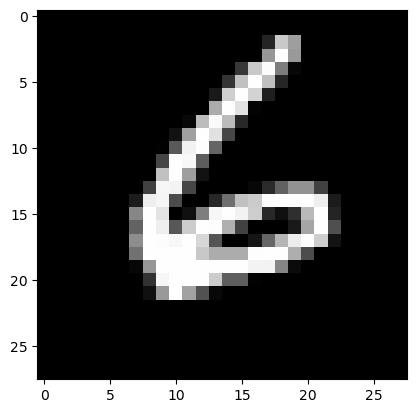

In [12]:
# predict particular picture

# 推理第8505张图片的数字类别
index = 800
model.eval()
data = X_test[index]

output = model(data)
_, predicted = torch.max(output.data, 0)
print("预测结果是{}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("这一图像数据的正确标签是{:.0f}".format(y_test[index]))



### 特征提取法

Epoch [1/20], Loss: 0.7761
Epoch [2/20], Loss: 0.2325
Epoch [3/20], Loss: 0.1277
Epoch [4/20], Loss: 0.0882
Epoch [5/20], Loss: 0.0699
Epoch [6/20], Loss: 0.0546
Epoch [7/20], Loss: 0.0539
Epoch [8/20], Loss: 0.0463
Epoch [9/20], Loss: 0.0399
Epoch [10/20], Loss: 0.0229
Epoch [11/20], Loss: 0.0159
Epoch [12/20], Loss: 0.0207
Epoch [13/20], Loss: 0.0204
Epoch [14/20], Loss: 0.0685
Epoch [15/20], Loss: 0.0611
Epoch [16/20], Loss: 0.0312
Epoch [17/20], Loss: 0.0132
Epoch [18/20], Loss: 0.0124
Epoch [19/20], Loss: 0.0075
Epoch [20/20], Loss: 0.0208


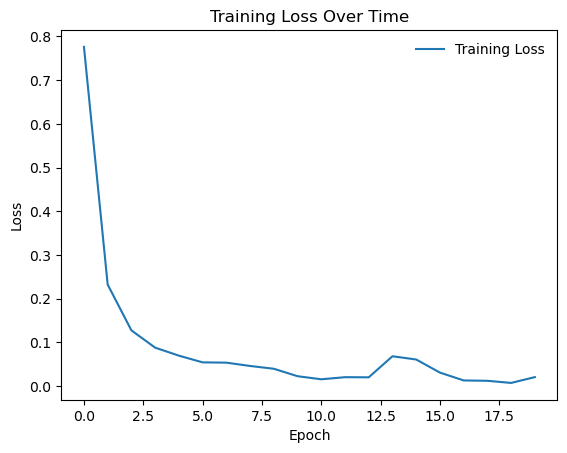

Test Accuracy: 92.15%


In [14]:
import torch
from torchvision import datasets, transforms
import numpy as np
import cv2
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

train_data = mnist_train.data[:5000].numpy()
train_labels = mnist_train.targets[:5000].numpy()
test_data = mnist_test.data[:2000].numpy()
test_labels = mnist_test.targets[:2000].numpy()

def downsample(image, size=(14, 14)):
    return cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)

def extract_edge_orientation(image):
    edges = cv2.Canny(image, 100, 200)
    sobelx = cv2.Sobel(np.float32(image), cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(np.float32(image), cv2.CV_64F, 0, 1, ksize=5)
    orientation = np.arctan2(sobely, sobelx)
    return orientation

def extract_features(data):
    features = []
    for img in data:
        downsampled_img = downsample(img)
        orientation_img = extract_edge_orientation(img)
        features.append(np.concatenate((downsampled_img.flatten(), orientation_img.flatten())))
    return np.array(features)

train_features = extract_features(train_data)
test_features = extract_features(test_data)

train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# 2. 模型设计
class SmallBPNet(nn.Module):
    def __init__(self):
        super(SmallBPNet, self).__init__()
        self.fc1 = nn.Linear(14*14 + 28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model1 = SmallBPNet()

# 3. 设置损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

# 4. 训练模型
epochs = 20
batch_size = 64
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_features), batch_size):
        inputs = train_features[i:i+batch_size]
        labels = train_labels[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss / (len(train_features) // batch_size)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(frameon=False)
plt.show()

correct = 0
total = 0

with torch.no_grad():
    for i in range(0, len(test_features), batch_size):
        inputs = test_features[i:i+batch_size]
        labels = test_labels[i:i+batch_size]
        
        outputs = model1(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# 特征点法
优点:
理论成熟：特征点法在研究和应用方面都非常广泛，如ORBSLAM等算法。
稳定性和鲁棒性：由于有描述子，特征点法对视觉特征的描述稳定，不易受光照影响。
回环检测：通过特征点建立的词袋模型，可以进行有效的回环检测。\
缺点:
对无纹理或弱纹理的处理困难：在无纹理或纹理较弱的环境中，特征点匹配变得困难。
计算资源消耗大：关键点和描述子的计算较为复杂，实时性不高。
图像利用率低：除了特征点，其他图像点对SLAM系统的贡献较小。

# 直接法
优点:
数据关联的整体处理：直接法以更整体和优雅的方式处理数据关联问题，不需要一一对应的特征匹配。
计算效率：节省了特征提取与匹配的时间，易于移植到嵌入式系统，并与IMU融合。
适用范围广：在特征缺失的情况下，如重复纹理或缺乏角点的环境，仍能使用。
地图重建：可以进行稠密或半稠密的地图重建。\
缺点:
灰度不变的假设：这是一个强假设，难以满足，特别是在曝光和模糊影像的情况下。
对相机要求高：通常需要全局快门相机，并进行光度标定。
地图复用和回环检测困难：直接法难以实现地图复用、回环检测和丢失后的重定位

# Fasion Mnist

In [16]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download = True)
test_dataset = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download = True)

In [17]:
BATCH_SIZE=256
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True) # shuffle 标识要打乱顺序
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=False) # shuffle 标识要打乱顺序，测试集不需要打乱

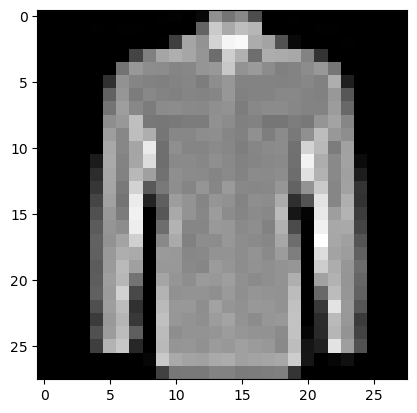

In [18]:
a=iter(train_loader)
data=next(a)
img=data[0][0].reshape(28,28)
data[0][0].shape,img.shape
(torch.Size([1, 28, 28]), torch.Size([28, 28]))
plt.imshow(img,cmap = plt.cm.gray)
plt.show()

In [19]:
import torch.nn as nn
import torch.nn.functional as F

# 定义一个用于服装分类的卷积神经网络
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        # 定义第一个卷积层，输入通道数为1，输出通道数为6，卷积核大小为5x5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 定义最大池化层，池化窗口大小为2x2
        self.pool = nn.MaxPool2d(2, 2)
        # 定义第二个卷积层，输入通道数为6，输出通道数为16，卷积核大小为5x5
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 定义第一个全连接层，输入大小为16*4*4，输出大小为120
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        # 定义第二个全连接层，输入大小为120，输出大小为84
        self.fc2 = nn.Linear(120, 84)
        # 定义第三个全连接层，输入大小为84，输出大小为10（对应10个类别）
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 通过第一个卷积层和ReLU激活函数，然后通过最大池化层
        x = self.pool(F.relu(self.conv1(x)))
        # 通过第二个卷积层和ReLU激活函数，然后通过最大池化层
        x = self.pool(F.relu(self.conv2(x)))
        # 展平张量，从多维张量变为二维张量
        x = x.view(-1, 16 * 4 * 4)
        # 通过第一个全连接层和ReLU激活函数
        x = F.relu(self.fc1(x))
        # 通过第二个全连接层和ReLU激活函数
        x = F.relu(self.fc2(x))
        # 通过第三个全连接层（输出层）
        x = self.fc3(x)
        return x
    

In [21]:
from datetime import datetime
import torch
import torchvision
import torchvision.transforms as transforms

# 定义图像转换操作：将图像转换为张量，并进行归一化处理
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))]) # 对图像的每个通道进行标准化，使得每个通道的像素值具有零均值和单位标准差

# 加载FashionMNIST训练数据集，并应用定义的图像转换操作
#training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform)

# 创建数据加载器，用于批量加载训练数据，batch_size为4，数据顺序随机打乱
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

# 实例化模型
model2 = GarmentClassifier()
# 定义损失函数为交叉熵损失
loss_fn = torch.nn.CrossEntropyLoss()
# 定义优化器为随机梯度下降（SGD），学习率为0.001，动量为0.9
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)

# 训练模型，训练2个epoch
for epoch in range(3):
    running_loss = 0.0  # 初始化累计损失
    # 枚举数据加载器中的数据，i是批次索引，data是当前批次的数据
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # 获取输入数据和对应的标签
        optimizer.zero_grad()  # 清空梯度
        outputs = model2(inputs)  # 前向传播，计算模型输出
        loss = loss_fn(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播，计算梯度
        optimizer.step()  # 更新模型参数
        running_loss += loss.item()  # 累加损失

        # 每2000个批次打印一次平均损失
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0  # 重置累计损失
      
# 获取当前时间戳，格式为 'YYYYMMDD_HHMMSS'
timestamp = datetime.now().strftime('%Y%m%d%H%M%S.pth')

# 定义模型保存路径，包含时间戳
model2_path = 'model2_{}'.format(timestamp)      

# 保存模型的状态字典到指定路径
torch.save(model2.state_dict(), model2_path)

[1, 2000] loss: 1.0247462303296198
[1, 4000] loss: 0.6593876647862126
[1, 6000] loss: 0.6012420449665987
[1, 8000] loss: 0.5611308816773589
[1, 10000] loss: 0.5566018648508143
[1, 12000] loss: 0.5565746168492698
[1, 14000] loss: 0.5018928329317659
[2, 2000] loss: 0.5262887316457723
[2, 4000] loss: 0.5056850721580041
[2, 6000] loss: 0.5108657411200038
[2, 8000] loss: 0.5177952152493278
[2, 10000] loss: 0.5047901200084592
[2, 12000] loss: 0.506114835432156
[2, 14000] loss: 0.4993993332820478
[3, 2000] loss: 0.4607184903337567
[3, 4000] loss: 0.5074207770389078
[3, 6000] loss: 0.4963278107731804
[3, 8000] loss: 0.520575558354888
[3, 10000] loss: 0.5617235661309727
[3, 12000] loss: 0.5628996655537875
[3, 14000] loss: 0.5667307931359543


In [24]:
import os
import glob
import torch
import torchvision.transforms as transforms
from PIL import Image
from datetime import datetime


def get_latest_model_path(directory, pattern="model_*.pth"):
    # 获取目录下所有符合模式的文件
    model_files = glob.glob(os.path.join(directory, pattern))
    if not model_files:
        raise FileNotFoundError("No model files found in the directory.")
    
    # 找到最新的模型文件
    latest_model_file = max(model_files, key=os.path.getmtime)
    return latest_model_file


# 定义图像转换操作：将图像转换为张量，并进行归一化处理
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # 调整图像大小为28x28
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载训练好的模型
model = GarmentClassifier()
model_path = get_latest_model_path('./')  # 获取最新的模型文件
model2.load_state_dict(torch.load(model_path, weights_only=False)) # 加载模型参数
model2.eval()  # 设置模型为评估模式

# 从本地加载图像
image_path = 'shoe.jpg'  # 替换为实际的图像路径
image = Image.open(image_path).convert('L')  # 将图像转换为灰度图
image.show()
# 预处理图像
image = transform(image)
image = image.unsqueeze(0)  # 增加一个批次维度

# 推理（预测）
with torch.no_grad():  # 在推理过程中不需要计算梯度
    outputs = model2(image)  # 前向传播，计算模型输出
    _, predicted = torch.max(outputs, 1)  # 获取预测结果

# 定义类别名称
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# 打印预测结果
print(f'Predicted label: {classes[predicted.item()]}')

Predicted label: Sandal
